In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from statsmodels.tsa.stattools import adfuller

In [2]:
df=pd.read_excel("DEXINUS.xlsx")

In [3]:
df['observation_date']=pd.to_datetime(df['observation_date'])

In [4]:
df['Year'] = df['observation_date'].dt.year
df['Month'] = df['observation_date'].dt.month

In [5]:
S = df.groupby(['Year', 'Month'])['DEXINUS'].mean().reset_index()

In [6]:
P_US=pd.read_excel('CPI_US.xlsx')
P_India=pd.read_excel('CPI_INDIA.xlsx')

In [7]:
P_India['observation_date']=pd.to_datetime(P_India['observation_date'])
P_US['observation_date']=pd.to_datetime(P_US['observation_date'])

In [8]:
P_I=P_India.drop([0,1,2,3,4,120])

In [9]:
P_US=P_US.drop([120,119,118,117,116,115])

In [10]:
S['observation_date'] = pd.to_datetime(dict(year=S['Year'], month=S['Month'], day=1))
S=S.drop(['Year','Month'],axis=1)

In [11]:
RER=S.merge(P_US, on='observation_date', how='outer') .merge(P_I, on='observation_date', how='outer')

In [12]:
RER.rename(columns={'DEXINUS': 'S', 'CPIAUCSL': 'P*','INDCPIALLMINMEI':'P'}, inplace=True)
RER

,S,observation_date,P*,P
0,65.097143,2015-08-01,238.033,100.9882
1,66.166667,2015-09-01,237.498,101.7533
2,65.026190,2015-10-01,237.733,102.9009
3,66.100000,2015-11-01,238.017,103.2834
4,66.502273,2015-12-01,237.761,102.9009
...,...,...,...,...
110,84.005000,2024-10-01,315.564,159.2043
111,84.332632,2024-11-01,316.449,159.2043
112,84.968571,2024-12-01,317.603,158.3229
113,86.265238,2025-01-01,319.086,157.7720


In [13]:
RER['ln_P'] = np.log(RER['P'])
RER['ln_P*'] = np.log(RER['P*'])
RER['ln_S'] = np.log(RER['S'])
RER['ln_RER']=RER['ln_S']+RER['ln_P*']-RER['ln_P']
RER['RER']=RER['S']*RER['P*']/RER['P']

In [18]:
RER

,S,observation_date,P*,P,ln_P,ln_P*,ln_S,ln_RER,RER
0,65.097143,2015-08-01,238.033,100.9882,4.615004,5.472409,4.175881,5.033286,153.436423
1,66.166667,2015-09-01,237.498,101.7533,4.622551,5.470159,4.192177,5.039785,154.436770
2,65.026190,2015-10-01,237.733,102.9009,4.633766,5.471148,4.174790,5.012172,150.230672
3,66.100000,2015-11-01,238.017,103.2834,4.637477,5.472342,4.191169,5.026034,152.327709
4,66.502273,2015-12-01,237.761,102.9009,4.633766,5.471266,4.197236,5.034736,153.658975
...,...,...,...,...,...,...,...,...,...
110,84.005000,2024-10-01,315.564,159.2043,5.070188,5.754362,4.430876,5.115050,166.509032
111,84.332632,2024-11-01,316.449,159.2043,5.070188,5.757162,4.434769,5.121743,167.627237
112,84.968571,2024-12-01,317.603,158.3229,5.064637,5.760802,4.442281,5.138447,170.450852
113,86.265238,2025-01-01,319.086,157.7720,5.061151,5.765461,4.457427,5.161736,174.467141


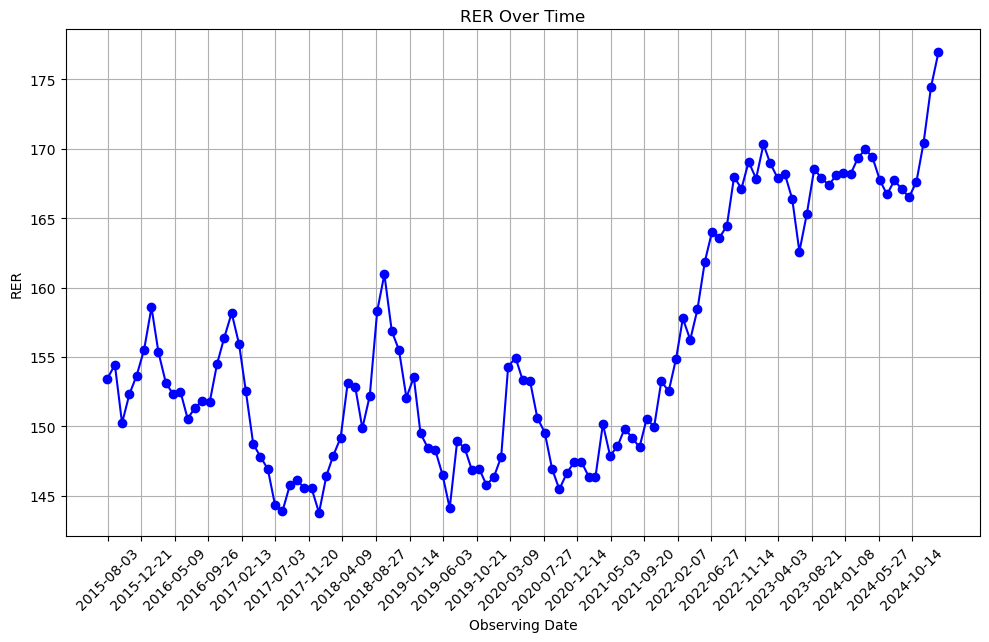

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(RER["observation_date"], RER['RER'], marker='o', linestyle='-', color='b')

plt.xlabel("Observing Date")
plt.ylabel("RER")
plt.title("RER Over Time")
plt.grid(True)
plt.tight_layout()

# Show only every 10th x-axis tick
plt.xticks(df["observation_date"][::100], rotation=45)

plt.show()


Trying.....

In [15]:
f=RER[['observation_date','ln_RER']]

In [16]:
f.head()

,observation_date,ln_RER
0,2015-08-01,5.033286
1,2015-09-01,5.039785
2,2015-10-01,5.012172
3,2015-11-01,5.026034
4,2015-12-01,5.034736


In [17]:
f.to_csv('final_series.csv')